<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)


In [4]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2952 - accuracy: 0.9132 - val_loss: 0.1375 - val_accuracy: 0.9604
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1399 - accuracy: 0.9581 - val_loss: 0.0987 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1065 - accuracy: 0.9676 - val_loss: 0.0840 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0880 - accuracy: 0.9734 - val_loss: 0.0727 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0727 - accuracy: 0.9767 - val_loss: 0.0714 - val_accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0640 - accuracy: 0.9797 - val_loss: 0.0707 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0687 - val_accuracy:

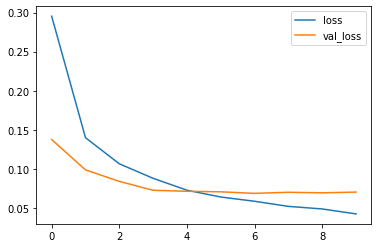

In [7]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

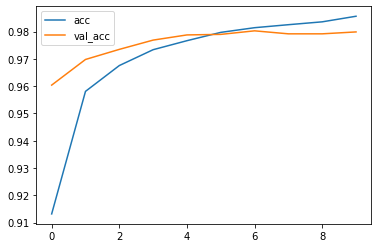

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9799
[0.07034464180469513, 0.9799000024795532]


313/313 [==============================] - 2s 4ms/step
Confusion matrix, without normalization
[[ 971    1    0    2    0    0    2    1    3    0]
 [   0 1124    2    0    0    1    2    1    5    0]
 [   5    0 1009    2    0    0    3    5    8    0]
 [   0    0    5  990    0    9    0    2    1    3]
 [   1    0    3    0  965    0    6    1    1    5]
 [   3    1    0    5    3  867    6    0    5    2]
 [   3    1    0    1    1    2  949    0    1    0]
 [   1    4   13    0    0    0    0 1004    2    4]
 [   8    0    3    2    4    1    3    1  950    2]
 [   3    3    0    7   16    3    0    5    2  970]]


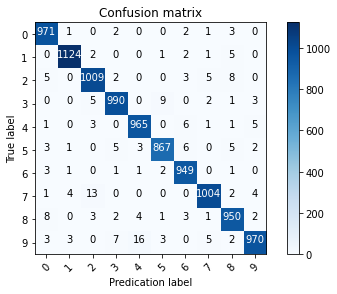

In [11]:
#Plot confiusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predication label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc

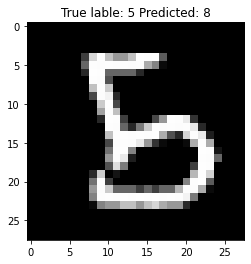

In [20]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True lable: %s Predicted: %s" % (y_test[i], p_test[i]));